Loading Libraries and the Dataset

In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
%matplotlib inline

In [71]:
data = pd.read_csv('C:/Users/avgon/Desktop/go_track_tracks.csv')

new_data = data.dropna(axis = 0, how ='any')

# comparing sizes of data frames 
print("Old data frame length:", len(data), "\nNew data frame length:",  
       len(new_data), "\nNumber of rows with at least 1 NA value: ", 
       (len(data)-len(new_data))) 

Old data frame length: 163 
New data frame length: 80 
Number of rows with at least 1 NA value:  83


In [72]:
new_data.head()

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
83,171,1,8.985648,0.004006,0.036,1,3,1,2,008 - SANTA TEREZA B INDUSTRIA
84,173,1,0.727684,0.013742,0.010,3,0,0,1,carro
85,177,1,3.456442,0.004340,0.015,3,1,1,2,040 - MARCOS FREIRE II DIA
86,179,1,1.580681,0.005061,0.008,3,1,2,2,008 - SANTA TEREZA B INDUSTRIA
87,180,1,0.254912,0.023537,0.006,2,0,0,1,carro


Standartizing Data with StandardScaler

In [73]:
from sklearn.preprocessing import StandardScaler
features = ['speed', 'time', 'distance']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['rating']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [74]:
pd.DataFrame(data = x, columns = features).head()

,speed,time,distance
0,0.156940,-0.432521,-0.348027
1,0.885797,-0.317948,-0.001630
2,-0.196946,-0.673585,-0.575719
3,0.191767,0.429262,0.314828
4,0.570094,-0.375119,-0.171677


The original data has 3 columns (speed, time, distance). The code projects the original data which is 3 dimensional into 2 dimensions

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

Concatenating DataFrame along axis = 1. finalDf is the final DataFrame before plotting the data.

In [76]:
finalDf = pd.concat([principalDf, data[['rating']]], axis = 1)

Visualize 2D Projection

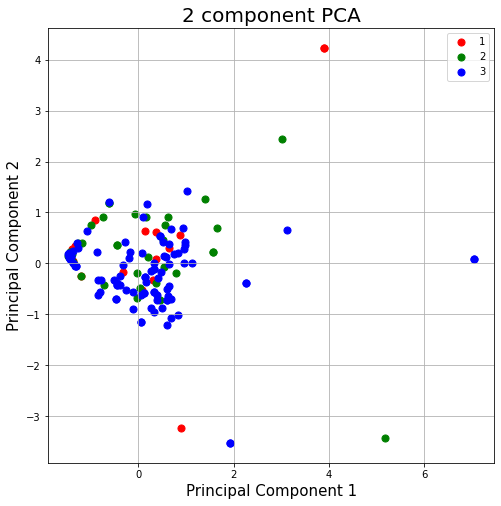

In [77]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['rating'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

The explained variance tells us how much information (variance) can be attributed to each of the principal components. This is important as while we can convert 3 dimensional space to 2 dimensional space, we lose some of the variance (information) when we do this. By using the attribute explained_variance_ratio_, we can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [78]:
pca.explained_variance_ratio_

array([0.66307131, 0.27021848])